In [1]:
# 경고메세지 제거
import warnings
warnings.filterwarnings('ignore')
# library import
import numpy as np
import pandas as pd
import glob
# 시각화 library import
!pip install missingno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#한글폰트 오류안나게
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_fname = 'C:\\Windows\\Fonts\\batang.ttc' # 아래한글 함초롱바탕 글꼴
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams['font.family'] = font_family

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\HCW\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
data = pd.read_csv('승인매출정보.csv', encoding='utf-8')
data.head()

In [4]:
for c in data.columns :
    print(c)

기준년월
발급회원번호
최종이용일자_기본
최종이용일자_신판
최종이용일자_CA
최종이용일자_카드론
최종이용일자_체크
최종이용일자_일시불
최종이용일자_할부
이용건수_신용_B0M
이용건수_신판_B0M
이용건수_일시불_B0M
이용건수_할부_B0M
이용건수_할부_유이자_B0M
이용건수_할부_무이자_B0M
이용건수_부분무이자_B0M
이용건수_CA_B0M
이용건수_체크_B0M
이용건수_카드론_B0M
이용금액_신용_B0M
이용금액_신판_B0M
이용금액_일시불_B0M
이용금액_할부_B0M
이용금액_할부_유이자_B0M
이용금액_할부_무이자_B0M
이용금액_부분무이자_B0M
이용금액_CA_B0M
이용금액_체크_B0M
이용금액_카드론_B0M
이용후경과월_신용
이용후경과월_신판
이용후경과월_일시불
이용후경과월_할부
이용후경과월_할부_유이자
이용후경과월_할부_무이자
이용후경과월_부분무이자
이용후경과월_CA
이용후경과월_체크
이용후경과월_카드론
이용건수_신용_R12M
이용건수_신판_R12M
이용건수_일시불_R12M
이용건수_할부_R12M
이용건수_할부_유이자_R12M
이용건수_할부_무이자_R12M
이용건수_부분무이자_R12M
이용건수_CA_R12M
이용건수_체크_R12M
이용건수_카드론_R12M
이용금액_신용_R12M
이용금액_신판_R12M
이용금액_일시불_R12M
이용금액_할부_R12M
이용금액_할부_유이자_R12M
이용금액_할부_무이자_R12M
이용금액_부분무이자_R12M
이용금액_CA_R12M
이용금액_체크_R12M
이용금액_카드론_R12M
최대이용금액_신용_R12M
최대이용금액_신판_R12M
최대이용금액_일시불_R12M
최대이용금액_할부_R12M
최대이용금액_할부_유이자_R12M
최대이용금액_할부_무이자_R12M
최대이용금액_부분무이자_R12M
최대이용금액_CA_R12M
최대이용금액_체크_R12M
최대이용금액_카드론_R12M
이용개월수_신용_R12M
이용개월수_신판_R12M
이용개월수_일시불_R12M
이용개월수_할부_R12M
이용개월수_할부_유이자_R12M
이용개월수_할부_무이자_

In [ ]:
collist  = ['발급회원번호','이용금액_신판_B0M','이용금액_신판_R12M','이용금액_신판_R6M','이용금액_신판_R3M',
            '_1순위업종','_1순위업종_이용금액','_2순위업종','_2순위업종_이용금액','_3순위업종','_3순위업종_이용금액',
            '_1순위쇼핑업종','_1순위쇼핑업종_이용금액','_2순위쇼핑업종','_2순위쇼핑업종_이용금액','_3순위쇼핑업종','_3순위쇼핑업종_이용금액',
            '_1순위교통업종','_1순위교통업종_이용금액','_2순위교통업종','_2순위교통업종_이용금액','_3순위교통업종','_3순위교통업종_이용금액',
            '_1순위여유업종','_1순위여유업종_이용금액','_2순위여유업종','_2순위여유업종_이용금액','_3순위여유업종','_3순위여유업종_이용금액',
            '_1순위납부업종','_1순위납부업종_이용금액','_2순위납부업종','_2순위납부업종_이용금액','_3순위납부업종','_3순위납부업종_이용금액',
            '이용금액_온라인_R6M','이용금액_오프라인_R6M','이용금액_온라인_R3M','이용금액_오프라인_R3M','이용금액_온라인_B0M','이용금액_오프라인_B0M','이용금액대'
]

In [ ]:
sales = data[collist]

In [ ]:
sales.head()

,발급회원번호,이용금액_신판_B0M,이용금액_신판_R12M,이용금액_신판_R6M,이용금액_신판_R3M,_1순위업종,_1순위업종_이용금액,_2순위업종,_2순위업종_이용금액,_3순위업종,...,_2순위납부업종_이용금액,_3순위납부업종,_3순위납부업종_이용금액,이용금액_온라인_R6M,이용금액_오프라인_R6M,이용금액_온라인_R3M,이용금액_오프라인_R3M,이용금액_온라인_B0M,이용금액_오프라인_B0M,이용금액대
0,SYN_0,107903,3262344,718343,318059,납부,201520,쇼핑,141329,일상생활,...,4500,NaN,0,0,2360924,0,1175608,0,393125,01.100만원+
1,SYN_1,243960,5604157,1655640,786755,납부,226049,쇼핑,176137,교통,...,0,NaN,0,0,2424629,0,1212832,0,403389,03.30만원+
2,SYN_2,273763,757181,273763,273763,NaN,0,NaN,0,NaN,...,0,NaN,0,0,0,0,0,0,0,05.10만원-
3,SYN_3,48942,468022,268087,146868,교통,53152,NaN,0,NaN,...,0,NaN,0,0,232251,0,116598,0,38885,05.10만원-
4,SYN_4,0,673648,0,0,NaN,0,NaN,0,NaN,...,0,NaN,0,0,0,0,0,0,0,09.미사용


In [10]:
sales.to_csv("sales.csv", index=False, encoding="utf-8-sig")


In [2]:
sales = pd.read_csv('sales.csv', encoding='utf-8')


In [3]:
user = pd.read_csv('회원정보_201812_16columns.csv', encoding='utf-8')
user.head()

,기준년월,발급회원번호,남녀구분코드,연령,VIP등급코드,최상위카드등급코드,회원여부_이용가능,소지여부_신용,소지카드수_유효_신용,입회경과개월수_신용,회원여부_연체,가입통신회사코드,거주시도명,직장시도명,카드신청건수,Life_Stage
0,201812,SYN_0,2,40,7.0,NaN,1,1,1,71,0,LGT,경기,경기,0,5
1,201812,SYN_1,1,30,NaN,1.0,1,1,1,16,0,KTF,서울,서울,0,4
2,201812,SYN_2,2,40,NaN,NaN,1,1,1,6,0,SKT,충남,충남,0,4
3,201812,SYN_3,1,40,NaN,NaN,1,1,2,153,0,SKT,충남,충남,0,4
4,201812,SYN_4,2,40,NaN,NaN,0,1,1,79,0,KTF,부산,부산,0,5


In [4]:
columns_to_add = user[['VIP등급코드', '남녀구분코드','Life_Stage','연령']]


In [5]:
sales_user = pd.concat([sales, columns_to_add], axis=1)

In [15]:
corrlist = ['VIP등급코드', '남녀구분코드','Life_Stage','연령','이용금액_신판_B0M','이용금액_신판_R12M','이용금액_신판_R6M','이용금액_신판_R3M',
            '_1순위업종_이용금액','_2순위업종_이용금액','_3순위업종_이용금액',
            '_1순위쇼핑업종_이용금액','_2순위쇼핑업종_이용금액','_3순위쇼핑업종_이용금액',
            '_1순위교통업종_이용금액','_2순위교통업종_이용금액','_3순위교통업종_이용금액',
            '_1순위여유업종_이용금액','_2순위여유업종_이용금액','_3순위여유업종_이용금액',
            '_1순위납부업종_이용금액','_2순위납부업종_이용금액','_3순위납부업종_이용금액',
            '이용금액_온라인_R6M','이용금액_오프라인_R6M','이용금액_온라인_R3M','이용금액_오프라인_R3M','이용금액_온라인_B0M','이용금액_오프라인_B0M']

In [16]:
sales_user_corr = sales_user[corrlist]

In [6]:
sales_user

,발급회원번호,이용금액_신판_B0M,이용금액_신판_R12M,이용금액_신판_R6M,이용금액_신판_R3M,_1순위업종,_1순위업종_이용금액,_2순위업종,_2순위업종_이용금액,_3순위업종,...,이용금액_오프라인_R6M,이용금액_온라인_R3M,이용금액_오프라인_R3M,이용금액_온라인_B0M,이용금액_오프라인_B0M,이용금액대,VIP등급코드,남녀구분코드,Life_Stage,연령
0,SYN_0,107903,3262344,718343,318059,납부,201520,쇼핑,141329,일상생활,...,2360924,0,1175608,0,393125,01.100만원+,7.0,2.0,5.0,40.0
1,SYN_1,243960,5604157,1655640,786755,납부,226049,쇼핑,176137,교통,...,2424629,0,1212832,0,403389,03.30만원+,NaN,1.0,4.0,30.0
2,SYN_2,273763,757181,273763,273763,NaN,0,NaN,0,NaN,...,0,0,0,0,0,05.10만원-,NaN,2.0,4.0,40.0
3,SYN_3,48942,468022,268087,146868,교통,53152,NaN,0,NaN,...,232251,0,116598,0,38885,05.10만원-,NaN,1.0,4.0,40.0
4,SYN_4,0,673648,0,0,NaN,0,NaN,0,NaN,...,0,0,0,0,0,09.미사용,NaN,2.0,5.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,SYN_2999995,0,0,0,0,NaN,0,NaN,0,NaN,...,0,0,0,0,0,09.미사용,NaN,NaN,NaN,NaN
2999996,SYN_2999996,355327,5383214,2152671,1202938,쇼핑,240844,교통,139202,사교활동,...,3043170,0,1822352,0,405306,01.100만원+,NaN,NaN,NaN,NaN
2999997,SYN_2999997,672375,9660844,4414500,2135865,쇼핑,1003117,납부,220789,사교활동,...,2675782,182980,1322252,64611,438234,02.50만원+,NaN,NaN,NaN,NaN
2999998,SYN_2999998,209431,3383113,1395109,679875,쇼핑,325288,납부,192339,사교활동,...,1073869,47689,773833,47689,102831,04.10만원+,NaN,NaN,NaN,NaN


In [7]:
from matplotlib.ticker import FuncFormatter

In [8]:
def millions(x, pos):
    return f'{int(x / 1e6)}M' 

In [10]:
sales_user.to_csv("sales_user.csv", index=False, encoding="utf-8-sig")


In [ ]:
sales_user = pd.read_csv('sales_user.csv', encoding='utf-8')


1. VIP등급코드별 분석

    - VIP 등급별 이용금액: 이용금액_신판_B0M, 이용금액_신판_R12M, 이용금액_신판_R6M, 이용금액_신판_R3M 등의 합계를 계산하여 VIP 등급별 평균 이용금액을 비교.
    - VIP 등급별 업종 선호도: _1순위업종, _2순위업종, _3순위업종을 통해 VIP 등급별로 선호하는 업종의 순위를 분석.
    - VIP 등급별 오프라인/온라인 소비 패턴: 이용금액_온라인_R6M, 이용금액_오프라인_R6M, 이용금액_온라인_R3M, 이용금액_오프라인_R3M 등을 비교하여 VIP 등급에 따른 소비 채널 선호도를 확인.

In [7]:

# VIP 등급별 평균 이용금액 계산
average_usage = sales_user.groupby('VIP등급코드')['이용금액_신판_R12M'].mean()



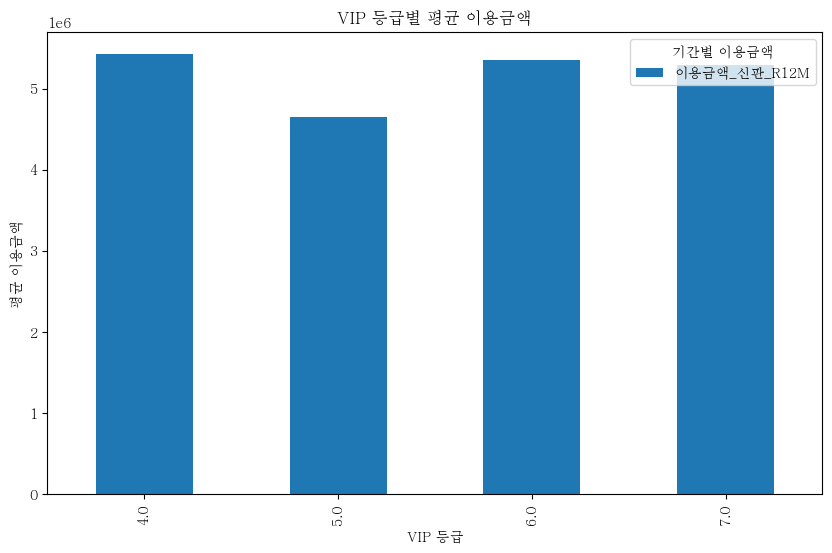

In [8]:

average_usage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('VIP 등급별 평균 이용금액')
plt.ylabel('평균 이용금액')
plt.xlabel('VIP 등급')
plt.legend(title='기간별 이용금액')
plt.show()


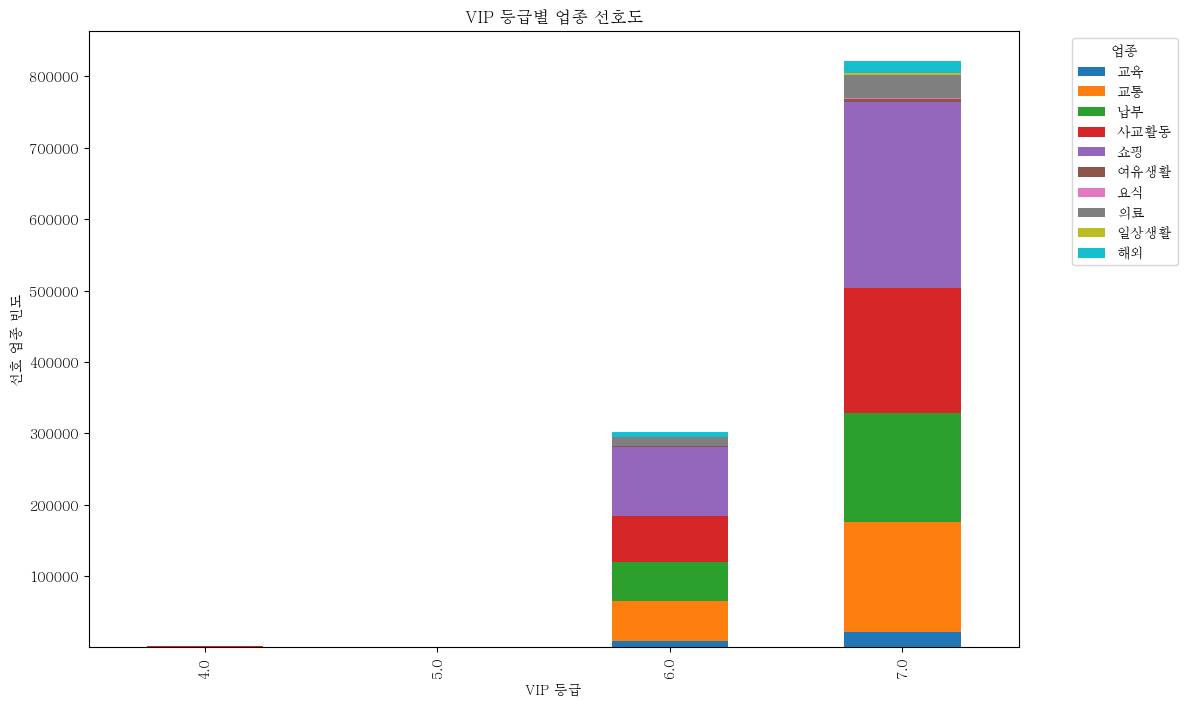

In [24]:
# VIP 등급별 업종 선호도 분석
industry_melted = pd.melt(sales_user, id_vars=['VIP등급코드'], value_vars=['_1순위업종', '_2순위업종', '_3순위업종'],
                          var_name='업종순위', value_name='업종')
top_industries = industry_melted.groupby(['VIP등급코드', '업종']).size().unstack(fill_value=0)

top_industries.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('VIP 등급별 업종 선호도')
plt.ylabel('선호 업종 빈도')
plt.xlabel('VIP 등급')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1))
plt.show()


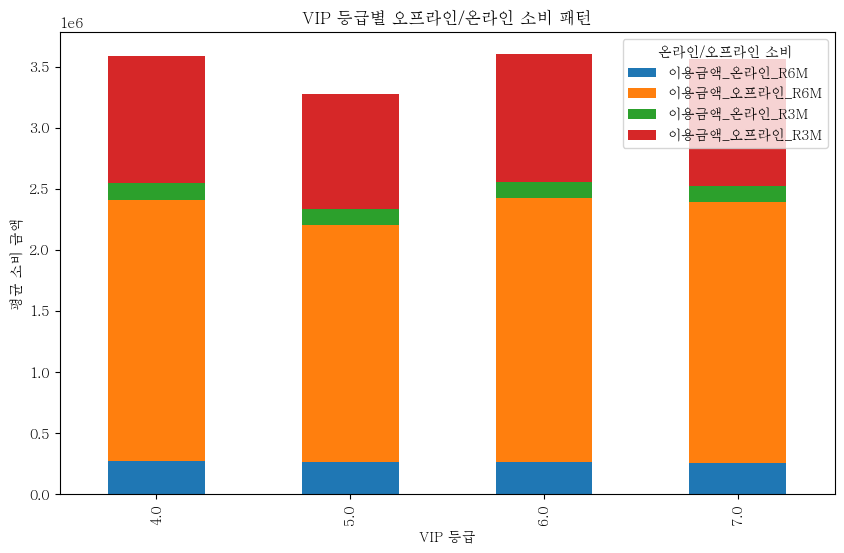

In [25]:

# VIP 등급별 오프라인/온라인 소비 패턴 분석
online_offline_usage = sales_user.groupby('VIP등급코드')[['이용금액_온라인_R6M', '이용금액_오프라인_R6M', '이용금액_온라인_R3M', '이용금액_오프라인_R3M']].mean()


online_offline_usage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('VIP 등급별 오프라인/온라인 소비 패턴')
plt.ylabel('평균 소비 금액')
plt.xlabel('VIP 등급')
plt.legend(title='온라인/오프라인 소비')
plt.show()


2. 남녀구분코드별 분석

    - 성별 이용금액 차이: 남녀별로 이용금액_신판_B0M, 이용금액_신판_R12M 등의 평균 및 합계를 비교하여 성별 소비 특성 확인.
    - 성별 업종 선호도: _1순위업종, _2순위업종, _3순위업종을 통해 남녀별로 선호하는 업종 순위 분석.
    - 성별 온라인/오프라인 소비 차이: 이용금액_온라인과 이용금액_오프라인 컬럼들을 성별로 나누어 비교하여 남녀 소비 경향을 파악.

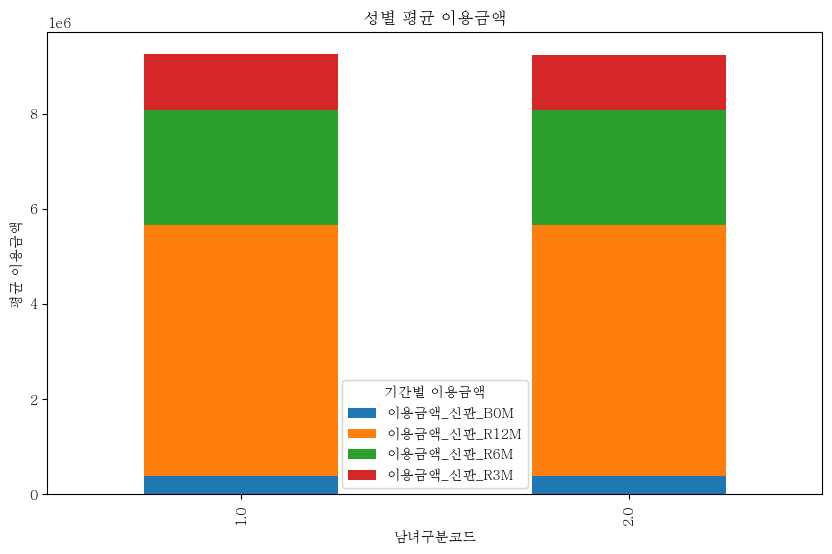

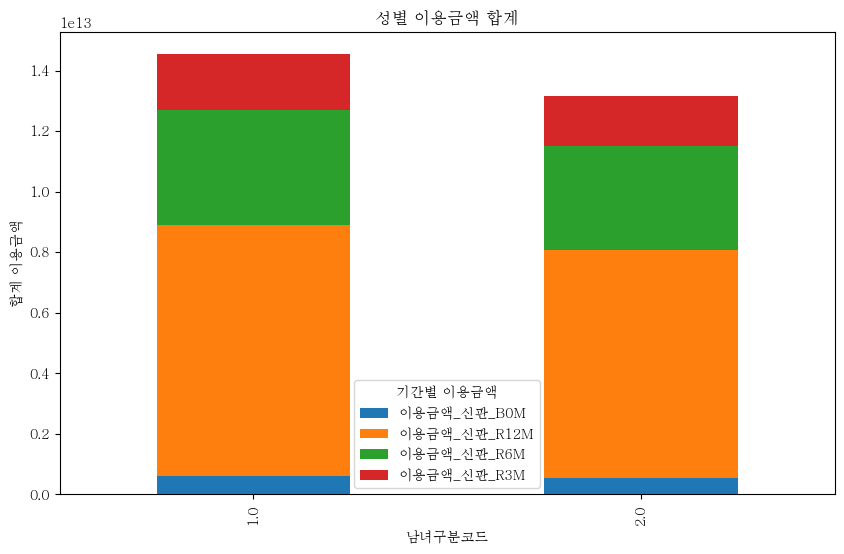

In [27]:

# 성별 이용금액 차이 분석 (평균)
gender_usage_mean = sales_user.groupby('남녀구분코드')[['이용금액_신판_B0M', '이용금액_신판_R12M', '이용금액_신판_R6M', '이용금액_신판_R3M']].mean()
gender_usage_sum = sales_user.groupby('남녀구분코드')[['이용금액_신판_B0M', '이용금액_신판_R12M', '이용금액_신판_R6M', '이용금액_신판_R3M']].sum()

# 시각화: 성별 평균 이용금액
gender_usage_mean.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('성별 평균 이용금액')
plt.ylabel('평균 이용금액')
plt.xlabel('남녀구분코드')
plt.legend(title='기간별 이용금액')
plt.show()

# 시각화: 성별 합계 이용금액
gender_usage_sum.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('성별 이용금액 합계')
plt.ylabel('합계 이용금액')
plt.xlabel('남녀구분코드')
plt.legend(title='기간별 이용금액')
plt.show()

In [28]:
preference = pd.melt(sales_user, id_vars=['남녀구분코드'], value_vars=['_1순위업종','_2순위업종','_3순위업종'], var_name='업종순위', value_name= '업종')
gender_top_industry = preference.groupby(['남녀구분코드','업종']).size().unstack(fill_value=0)

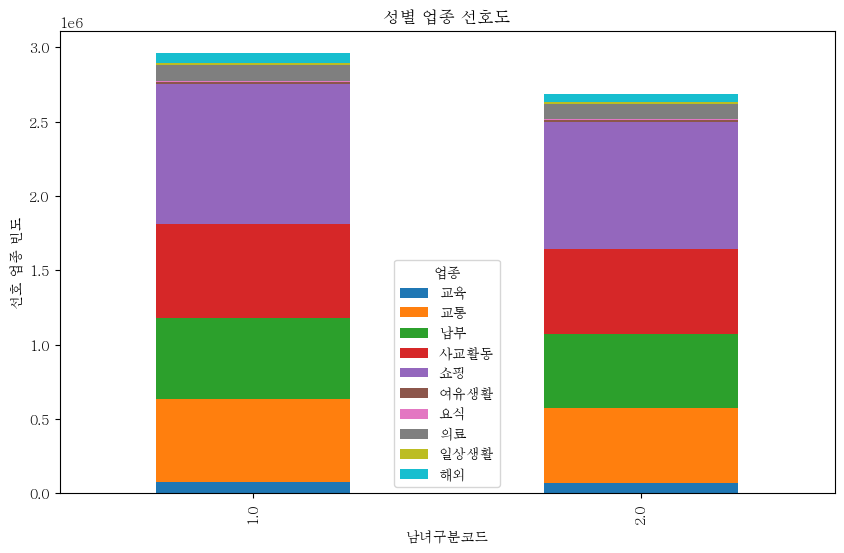

In [31]:
gender_top_industry.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('성별 업종 선호도')
plt.ylabel('선호 업종 빈도')
plt.xlabel('남녀구분코드')
plt.legend(title='업종')   #, bbox_to_anchor=(1.05, 1))
plt.show()

In [51]:
sales_user.shape

(3000000, 46)

In [9]:
sales_user.head()

,발급회원번호,이용금액_신판_B0M,이용금액_신판_R12M,이용금액_신판_R6M,이용금액_신판_R3M,_1순위업종,_1순위업종_이용금액,_2순위업종,_2순위업종_이용금액,_3순위업종,...,이용금액_오프라인_R6M,이용금액_온라인_R3M,이용금액_오프라인_R3M,이용금액_온라인_B0M,이용금액_오프라인_B0M,이용금액대,VIP등급코드,남녀구분코드,Life_Stage,연령
0,SYN_0,107903,3262344,718343,318059,납부,201520,쇼핑,141329,일상생활,...,2360924,0,1175608,0,393125,01.100만원+,7.0,2.0,5.0,40.0
1,SYN_1,243960,5604157,1655640,786755,납부,226049,쇼핑,176137,교통,...,2424629,0,1212832,0,403389,03.30만원+,NaN,1.0,4.0,30.0
2,SYN_2,273763,757181,273763,273763,NaN,0,NaN,0,NaN,...,0,0,0,0,0,05.10만원-,NaN,2.0,4.0,40.0
3,SYN_3,48942,468022,268087,146868,교통,53152,NaN,0,NaN,...,232251,0,116598,0,38885,05.10만원-,NaN,1.0,4.0,40.0
4,SYN_4,0,673648,0,0,NaN,0,NaN,0,NaN,...,0,0,0,0,0,09.미사용,NaN,2.0,5.0,40.0


3. Life_Stage별 분석

    - Life_Stage별 이용금액 분석: 이용금액_신판_R12M, 이용금액_신판_R6M, 이용금액_신판_R3M 등의 평균을 산출하여 Life_Stage에 따른 소비 패턴 분석.
    - Life_Stage별 선호 업종: _1순위업종, _2순위업종, _3순위업종의 빈도수를 분석하여 Life_Stage별 선호 업종 확인.
    - Life_Stage별 채널 선호도: 이용금액_온라인 및 이용금액_오프라인을 통해 Life_Stage별 온라인/오프라인 소비 비중 분석.

In [12]:
lifestage_usage = sales_user.groupby('Life_Stage')[['이용금액_신판_R12M', '이용금액_신판_R6M', '이용금액_신판_R3M']].mean()


In [14]:
lifestage_usage

,이용금액_신판_R12M,이용금액_신판_R6M,이용금액_신판_R3M
Life_Stage,,,
1.0,5.225634e+06,2.381162e+06,1.154773e+06
2.0,5.293069e+06,2.409702e+06,1.168236e+06
3.0,5.280006e+06,2.402999e+06,1.164675e+06
4.0,5.283699e+06,2.408505e+06,1.167344e+06
5.0,5.277712e+06,2.404335e+06,1.165314e+06
6.0,5.292395e+06,2.408024e+06,1.167142e+06
7.0,5.280857e+06,2.406000e+06,1.166082e+06


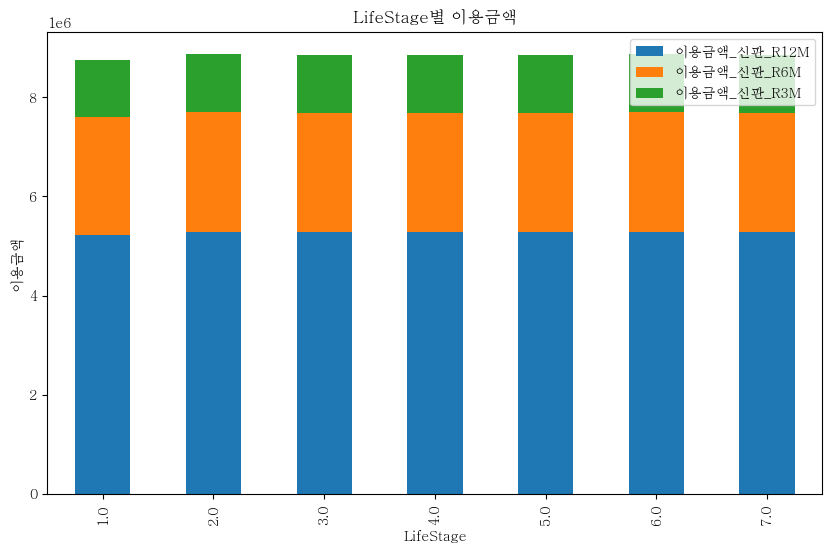

In [13]:
lifestage_usage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('LifeStage별 이용금액')
plt.ylabel('이용금액')
plt.xlabel('LifeStage')
plt.show()

In [22]:
lifestage_usage_12 = sales_user.groupby('Life_Stage')['이용금액_신판_R12M'].mean()
lifestage_usage_6 = sales_user.groupby('Life_Stage')['이용금액_신판_R6M'].mean()
lifestage_usage_3 = sales_user.groupby('Life_Stage')['이용금액_신판_R3M'].mean()


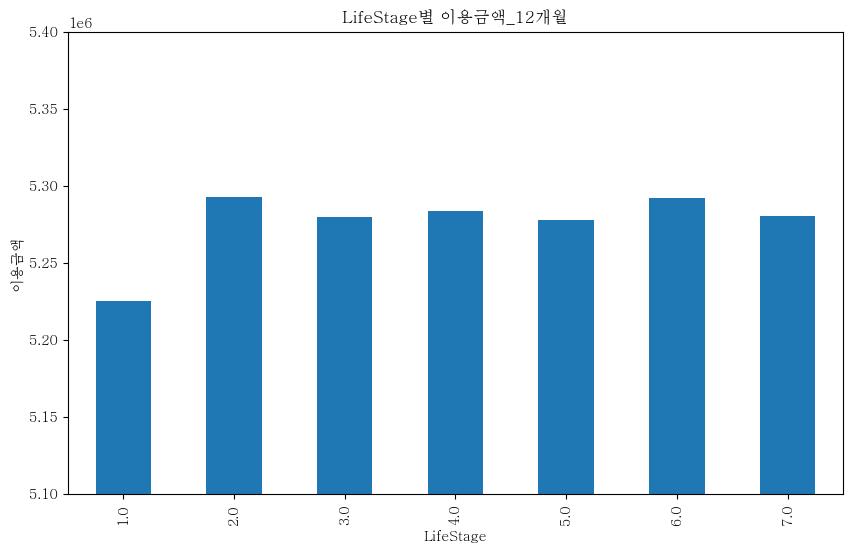

In [47]:
lifestage_usage_12.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('LifeStage별 이용금액_12개월')
plt.ylabel('이용금액')
plt.xlabel('LifeStage')
plt.ylim(5100000, 5400000)

plt.show()

In [35]:
import math

In [37]:
math.floor(min(lifestage_usage_6))

2381162

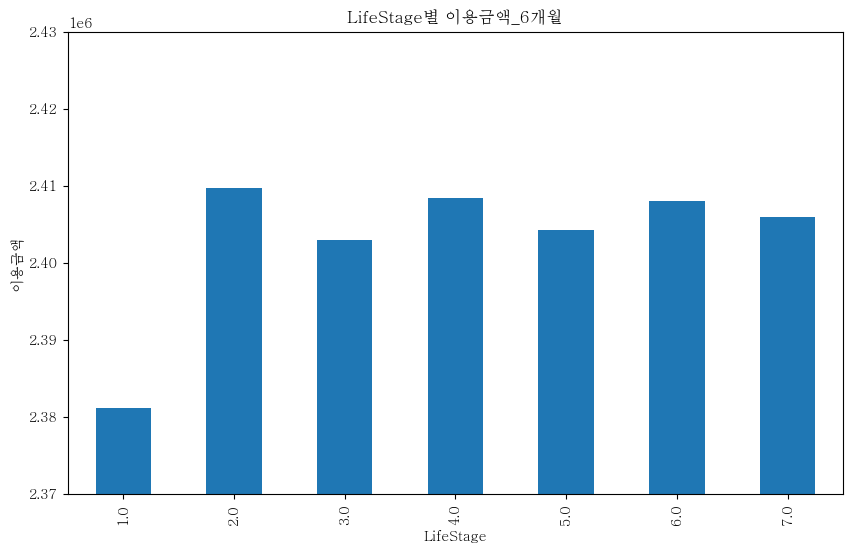

In [48]:
lifestage_usage_6.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('LifeStage별 이용금액_6개월')
plt.ylabel('이용금액')
plt.xlabel('LifeStage')
plt.ylim(2370000, 2430000)

plt.show()

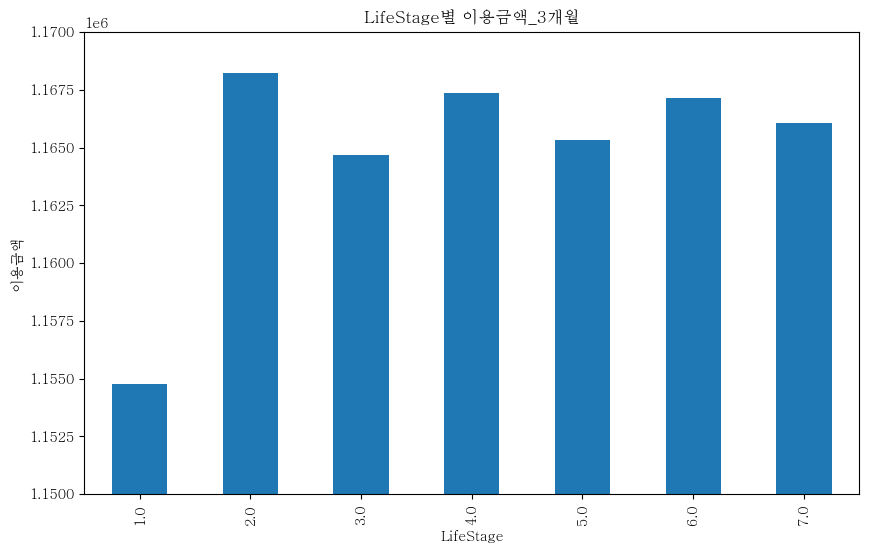

In [49]:
lifestage_usage_3.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('LifeStage별 이용금액_3개월')
plt.ylabel('이용금액')
plt.xlabel('LifeStage')
plt.ylim(1150000, 1170000)

plt.show()

In [65]:
import math# import floor, ceil

In [78]:
lifestage_gender_usage_12 = sales_user.groupby(['Life_Stage','남녀구분코드'])['이용금액_신판_R12M'].mean()
lifestage_gender_usage_6 = sales_user.groupby(['Life_Stage','남녀구분코드'])['이용금액_신판_R6M'].mean()



In [71]:
def floorround(num) : 
    num = math.floor(num * 0.0001) * 10000
    return num

def ceilround(num) : 
        num = math.ceil(num * 0.0001) * 10000
        return num

In [67]:
print(min(lifestage_gender_usage_12))
print(max(lifestage_gender_usage_12))

5217279.168845289
5303879.236181711


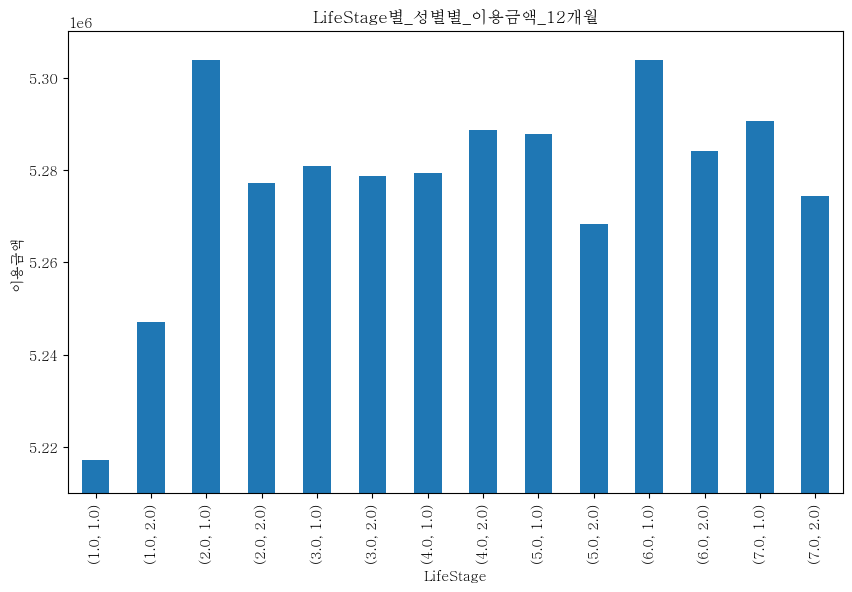

In [73]:
lifestage_gender_usage_12.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('LifeStage별_성별별_이용금액_12개월')
plt.ylabel('이용금액')
plt.xlabel('LifeStage')
plt.ylim(floorround(min(lifestage_gender_usage_12)), ceilround(max(lifestage_gender_usage_12)))

plt.show()

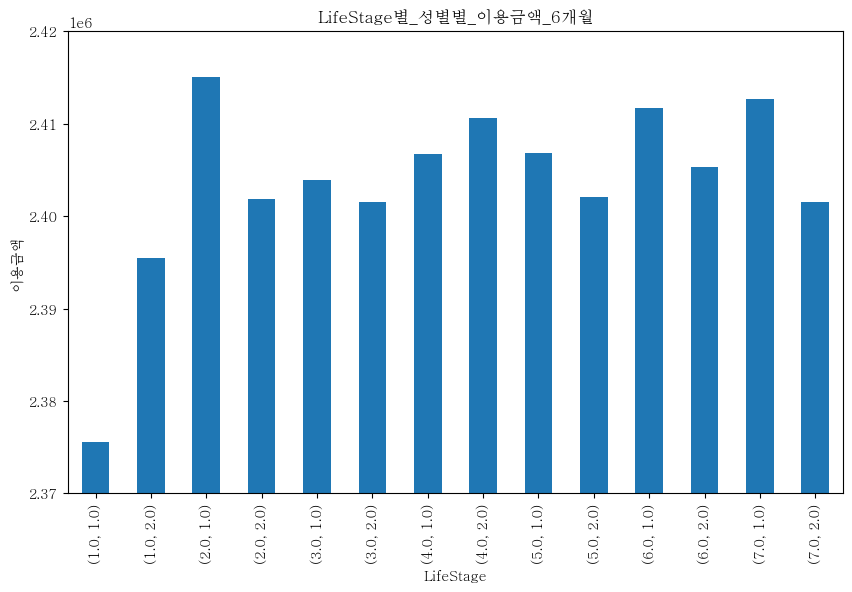

In [80]:
lifestage_gender_usage_6.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('LifeStage별_성별별_이용금액_6개월')
plt.ylabel('이용금액')
plt.xlabel('LifeStage')
plt.ylim(floorround(min(lifestage_gender_usage_6)), ceilround(max(lifestage_gender_usage_6)))

plt.show()

In [ ]:
lifestage_age_usage_12 = sales_user.groupby(['Life_Stage','연령'])['이용금액_신판_R12M'].mean()


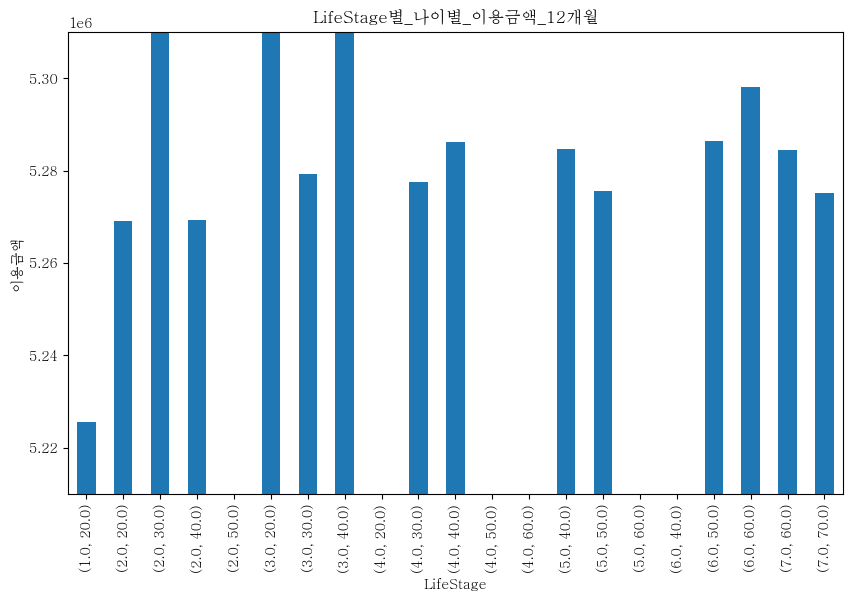

In [84]:
lifestage_age_usage_12.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('LifeStage별_나이별_이용금액_12개월')
plt.ylabel('이용금액')
plt.xlabel('LifeStage')
plt.ylim(floorround(min(lifestage_gender_usage_12)), ceilround(max(lifestage_gender_usage_12)))

plt.show()

In [85]:
lifestage_gender_age_usage_12 = sales_user.groupby(['Life_Stage','남녀구분코드','연령'])['이용금액_신판_R12M'].mean()


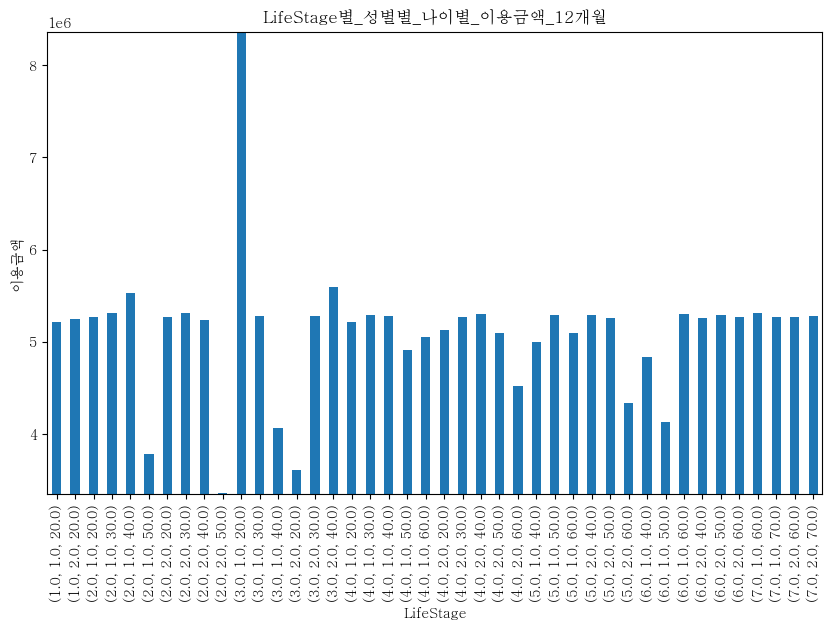

In [87]:
lifestage_gender_age_usage_12.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('LifeStage별_성별별_나이별_이용금액_12개월')
plt.ylabel('이용금액')
plt.xlabel('LifeStage')
plt.ylim(floorround(min(lifestage_gender_age_usage_12)), ceilround(max(lifestage_gender_age_usage_12)))

plt.show()

### 나이 > 성별 > 라이프스테이지 순으로 이상치 탐지 

In [88]:
sales_user.head(2)

,발급회원번호,이용금액_신판_B0M,이용금액_신판_R12M,이용금액_신판_R6M,이용금액_신판_R3M,_1순위업종,_1순위업종_이용금액,_2순위업종,_2순위업종_이용금액,_3순위업종,...,이용금액_오프라인_R6M,이용금액_온라인_R3M,이용금액_오프라인_R3M,이용금액_온라인_B0M,이용금액_오프라인_B0M,이용금액대,VIP등급코드,남녀구분코드,Life_Stage,연령
0,SYN_0,107903,3262344,718343,318059,납부,201520,쇼핑,141329,일상생활,...,2360924,0,1175608,0,393125,01.100만원+,7.0,2.0,5.0,40.0
1,SYN_1,243960,5604157,1655640,786755,납부,226049,쇼핑,176137,교통,...,2424629,0,1212832,0,403389,03.30만원+,NaN,1.0,4.0,30.0


In [92]:
sales_user.연령.value_counts()

연령
40.0    915634
30.0    739119
50.0    683764
60.0    309298
20.0    239972
70.0    111397
Name: count, dtype: int64

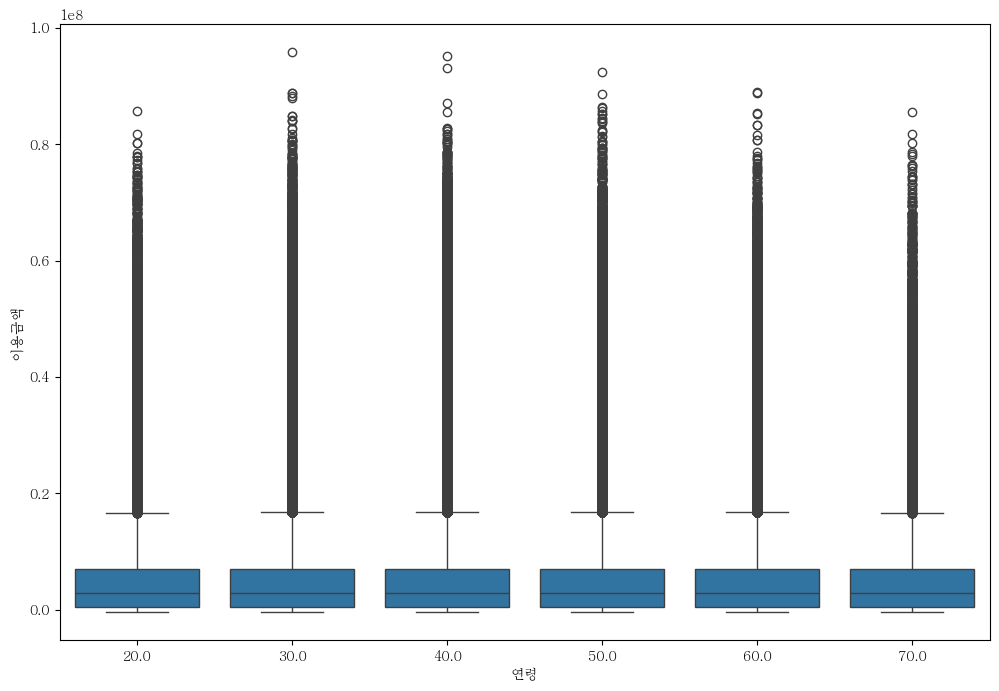

In [94]:
plt.figure(figsize=(12,8))
sns.boxplot(data = sales_user, x = '연령', y = '이용금액_신판_R12M')
plt.xlabel('연령')
plt.ylabel('이용금액')
plt.show()

In [95]:
def to_millions(x, pos):
    return f'{int(x / 1e6)}M'  

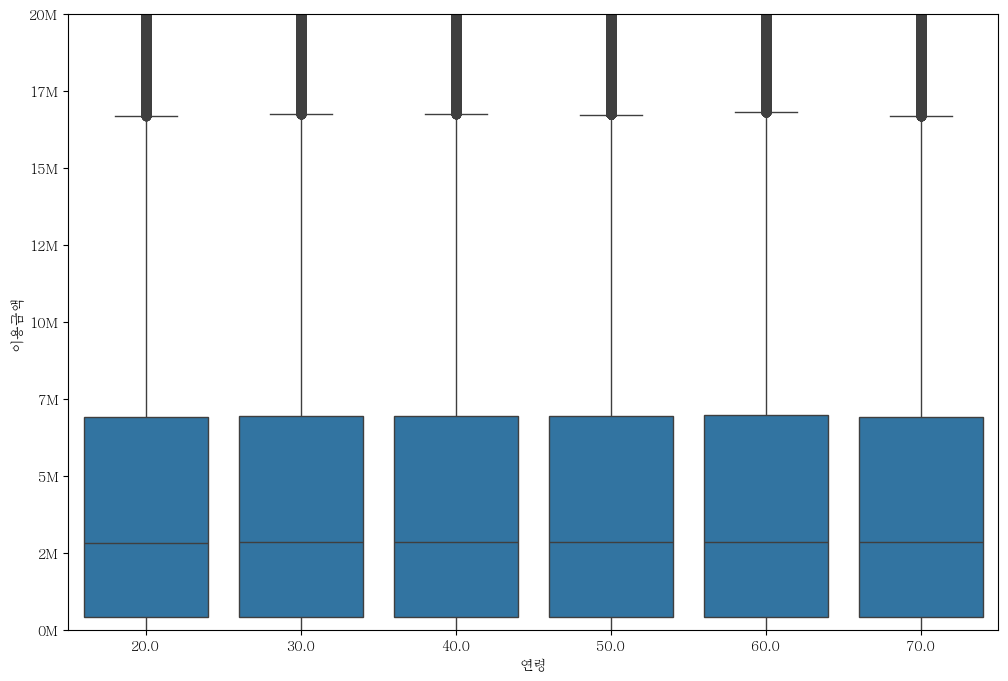

In [98]:
plt.figure(figsize=(12,8))
sns.boxplot(data = sales_user, x = '연령', y = '이용금액_신판_R12M')
plt.ylim(0, 2e7)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_millions))
plt.xlabel('연령')
plt.ylabel('이용금액')
plt.show()

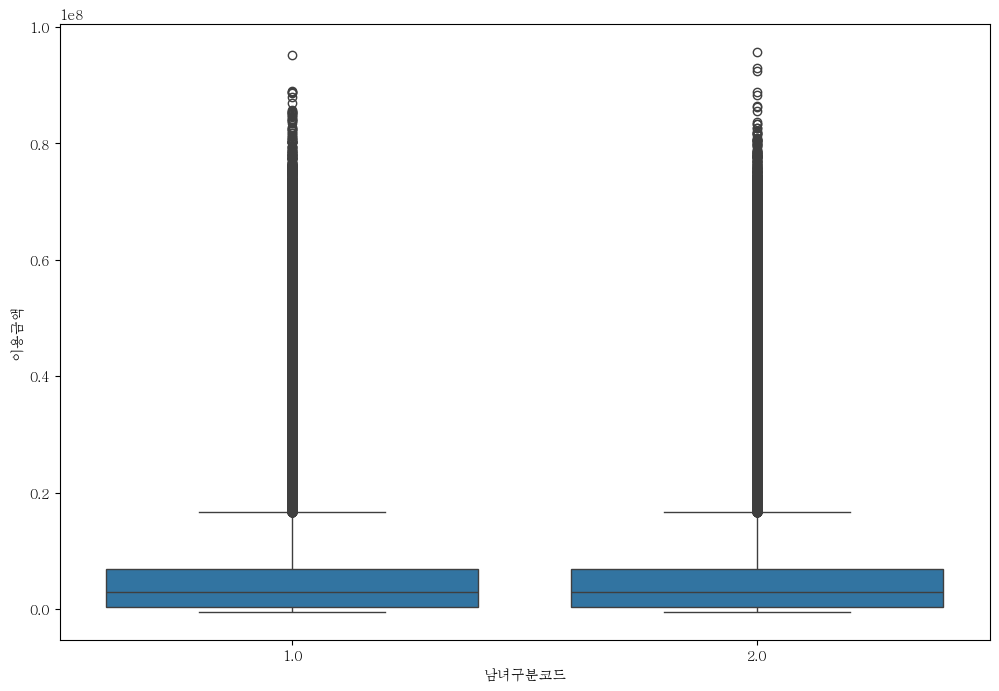

In [99]:
plt.figure(figsize=(12,8))
sns.boxplot(data = sales_user, x = '남녀구분코드', y = '이용금액_신판_R12M')
plt.xlabel('남녀구분코드')
plt.ylabel('이용금액')
plt.show()

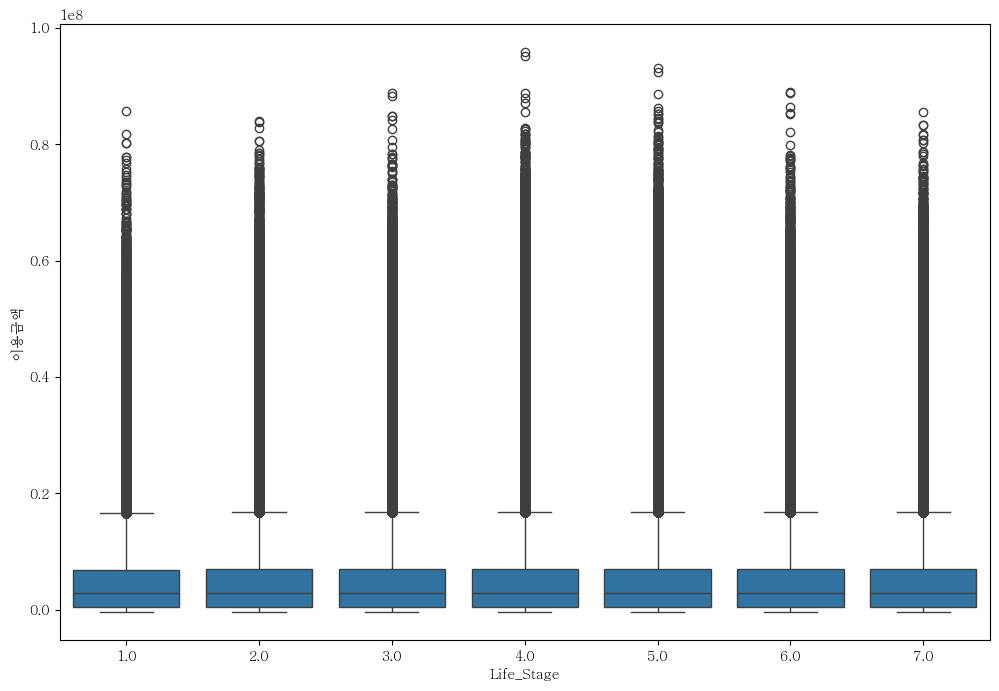

In [100]:
plt.figure(figsize=(12,8))
sns.boxplot(data = sales_user, x = 'Life_Stage', y = '이용금액_신판_R12M')
plt.xlabel('Life_Stage')
plt.ylabel('이용금액')
plt.show()

In [15]:
preference = pd.melt(sales_user, id_vars=['Life_Stage'], value_vars=['_1순위업종','_2순위업종','_3순위업종'], var_name='업종순위', value_name= '업종')
lifestage_top_industry = preference.groupby(['Life_Stage','업종']).size().unstack(fill_value=0)

In [17]:
lifestage_top_industry

업종,교육,교통,납부,사교활동,쇼핑,여유생활,요식,의료,일상생활,해외
Life_Stage,,,,,,,,,,
1.0,5745,40444,40012,45739,68401,991,708,8141,886,4503
2.0,15428,107136,106415,121946,181858,2564,1798,21773,2411,12064
3.0,15417,107605,106847,122724,182860,2588,1793,21497,2524,12143
4.0,50543,350596,348336,399910,596495,8524,5849,70503,7929,39087
5.0,37168,259357,257784,295948,440324,6268,4349,52008,5839,28845
6.0,12245,86841,86304,99457,147774,2176,1398,17785,1961,9677
7.0,14560,102646,102078,116699,174055,2441,1754,20608,2314,11505


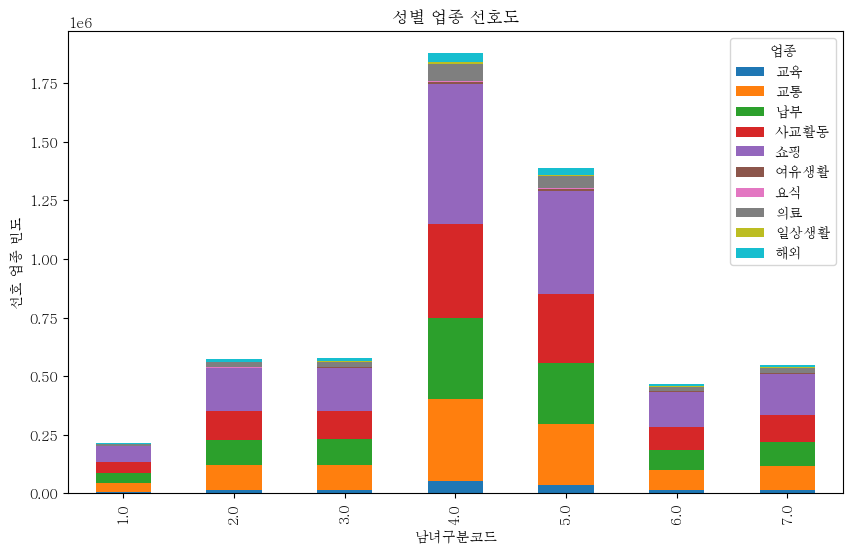

In [16]:
lifestage_top_industry.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('성별 업종 선호도')
plt.ylabel('선호 업종 빈도')
plt.xlabel('남녀구분코드')
plt.legend(title='업종')   #, bbox_to_anchor=(1.05, 1))
plt.show()

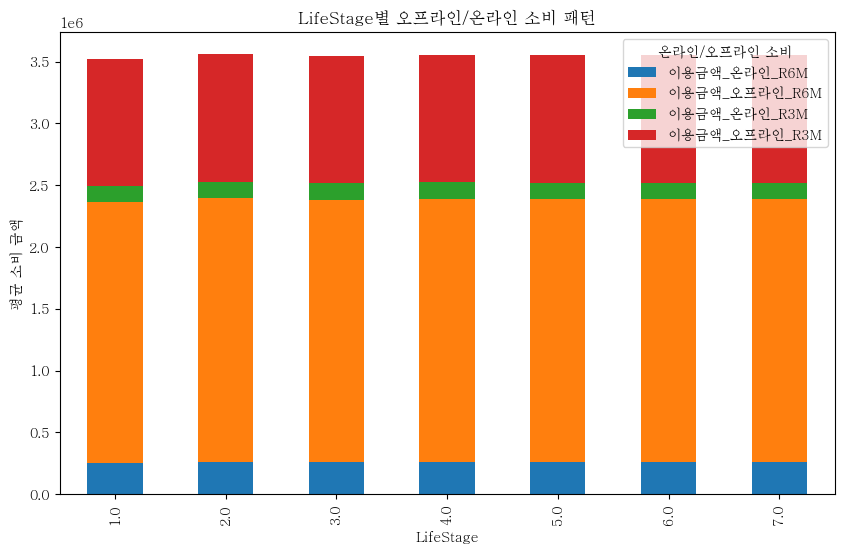

In [19]:
lifestage_online_offline_usage = sales_user.groupby('Life_Stage')[['이용금액_온라인_R6M', '이용금액_오프라인_R6M', '이용금액_온라인_R3M', '이용금액_오프라인_R3M']].mean()


lifestage_online_offline_usage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('LifeStage별 오프라인/온라인 소비 패턴')
plt.ylabel('평균 소비 금액')
plt.xlabel('LifeStage')
plt.legend(title='온라인/오프라인 소비')
plt.show()
